# Question 1

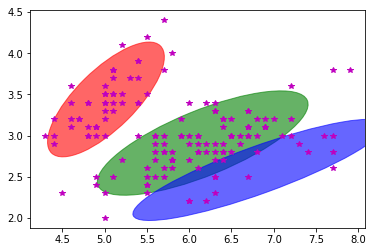

In [13]:
import numpy as np
import pylab as plt    
from matplotlib.patches import Ellipse 
from sklearn import datasets    
from collections import namedtuple
    
class GMM:    
    def __init__(self, k, eps):
        self.k = k ## number of clusters
        self.eps = eps ## threshold to stop `epsilon`
        
        # All parameters from fitting/learning are kept in a named tuple
        from collections import namedtuple
    
    def fit_EM(self, X, max_iters):
        
        # n = number of data-points, d = dimension of data points        
        n, d = X.shape
        
        # randomly choose the starting centroids/means 
        ## as 3 of the points from datasets        
        mu = X[np.random.choice(n, self.k, False), :]
        
        # initialize the covariance matrices for each gaussians
        Sigma= [np.eye(d)] * self.k
        
        # initialize the probabilities/weights for each gaussians
        w = [1./self.k] * self.k
        
        # responsibility matrix is initialized to all zeros
        # we have responsibility for each of n points for eack of k gaussians
        R = np.zeros((n, self.k))
        
        ### log_likelihoods
        log_likelihoods = []
        
        P = lambda mu, s: np.linalg.det(s) ** -.5 ** (2 * np.pi) ** (-X.shape[1]/2.) \
                * np.exp(-.5 * np.einsum('ij, ij -> i',\
                        X - mu, np.dot(np.linalg.inv(s) , (X - mu).T).T ) ) 
                        
        # Iterate till max_iters iterations        
        while len(log_likelihoods) < max_iters:
            
            # E - Step
            
            ## Vectorized implementation of e-step equation to calculate the 
            ## membership for each of k -gaussians
            for k in range(self.k):
                R[:, k] = w[k] * P(mu[k], Sigma[k])

            ### Likelihood computation
            log_likelihood = np.sum(np.log(np.sum(R, axis = 1)))
            
            log_likelihoods.append(log_likelihood)
            
            ## Normalize so that the responsibility matrix is row stochastic
            R = (R.T / np.sum(R, axis = 1)).T
            
            ## The number of datapoints belonging to each gaussian            
            N_ks = np.sum(R, axis = 0)
            
            
            # M Step
            ## calculate the new mean and covariance for each gaussian by 
            ## utilizing the new responsibilities
            for k in range(self.k):
                
                ## means
                mu[k] = 1. / N_ks[k] * np.sum(R[:, k] * X.T, axis = 1).T
                x_mu = np.matrix(X - mu[k])
                
                ## covariances
                Sigma[k] = np.array(1 / N_ks[k] * np.dot(np.multiply(x_mu.T,  R[:, k]), x_mu))
                
                ## and finally the probabilities
                w[k] = 1. / n * N_ks[k]
            # check for convergence
            if len(log_likelihoods) < 2 : continue
            if np.abs(log_likelihood - log_likelihoods[-2]) < self.eps: break
        
        ## bind all results together
    
        self.params = namedtuple('params', ['mu', 'Sigma', 'w', 'log_likelihoods', 'num_iters'])
        self.params.mu = mu
        self.params.Sigma = Sigma
        self.params.w = w
        self.params.log_likelihoods = log_likelihoods
        self.params.num_iters = len(log_likelihoods)       
        
        return self.params
    
    
    def predict(self, x):
        p = lambda mu, s : np.linalg.det(s) ** - 0.5 * (2 * np.pi) **\
                (-len(x)/2) * np.exp( -0.5 * np.dot(x - mu , np.dot(np.linalg.pinv(s) , x - mu)))
        probs = np.array([w * p(mu, s) for mu, s, w in \
            zip(self.params.mu, self.params.Sigma, self.params.w)])
        return probs/np.sum(probs)
        

        
def plot_ellipse(pos, cov, nstd=2, ax=None, **kwargs):
        def eigsorted(cov):
            vals, vecs = np.linalg.eigh(cov)
            order = vals.argsort()[::-1]
            return vals[order], vecs[:,order]
    
        if ax is None:
            ax = plt.gca()
    
        vals, vecs = eigsorted(cov)
        theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
        # Width and height are "full" widths, not radius
        width, height = 2 * nstd * np.sqrt(abs(vals))
        ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    
        ax.add_artist(ellip)
        return ellip    
    
def show(X, mu, cov):
        plt.cla()
        K = len(mu) # number of clusters
        colors = ['r', 'g', 'b']
        plt.plot(X.T[0], X.T[1], 'm*')
        for k in range(K):
            plot_ellipse(mu[k], cov[k],  alpha=0.6, color = colors[k % len(colors)])
    
# Input Data
iris = datasets.load_iris()
X = iris.data[:,:2]
actualLabels = iris.target+1
    
# Executing the EM algorithm for Gaussian Mixture Models
gmm = GMM(3, 0.0001)
params = gmm.fit_EM(X, 1000)
    
predLabels = []
for i in range(len(X)):       
        predLabels.append(np.argmax(gmm.predict(X[i]))+1)

show(X, params.mu, params.Sigma)
plt.show()

# https://gist.github.com/bistaumanga/6023716

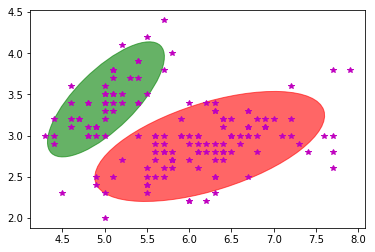

In [17]:
import numpy as np
import pylab as plt    
from matplotlib.patches import Ellipse 
from sklearn import datasets    
from collections import namedtuple
    
class GMM:    
    def __init__(self, k, eps):
        self.k = k ## number of clusters
        self.eps = eps ## threshold to stop `epsilon`
        
        # All parameters from fitting/learning are kept in a named tuple
        from collections import namedtuple
    
    def fit_EM(self, X, max_iters):
        
        # n = number of data-points, d = dimension of data points        
        n, d = X.shape
        
        # randomly choose the starting centroids/means 
        ## as 3 of the points from datasets        
        mu = X[np.random.choice(n, self.k, False), :]
        
        # initialize the covariance matrices for each gaussians
        Sigma= [np.eye(d)] * self.k
        
        # initialize the probabilities/weights for each gaussians
        w = [1./self.k] * self.k
        
        # responsibility matrix is initialized to all zeros
        # we have responsibility for each of n points for eack of k gaussians
        R = np.zeros((n, self.k))
        
        ### log_likelihoods
        log_likelihoods = []
        
        P = lambda mu, s: np.linalg.det(s) ** -.5 ** (2 * np.pi) ** (-X.shape[1]/2.) \
                * np.exp(-.5 * np.einsum('ij, ij -> i',\
                        X - mu, np.dot(np.linalg.inv(s) , (X - mu).T).T ) ) 
                        
        # Iterate till max_iters iterations        
        while len(log_likelihoods) < max_iters:
            
            # E - Step
            
            ## Vectorized implementation of e-step equation to calculate the 
            ## membership for each of k -gaussians
            for k in range(self.k):
                R[:, k] = w[k] * P(mu[k], Sigma[k])

            ### Likelihood computation
            log_likelihood = np.sum(np.log(np.sum(R, axis = 1)))
            
            log_likelihoods.append(log_likelihood)
            
            ## Normalize so that the responsibility matrix is row stochastic
            R = (R.T / np.sum(R, axis = 1)).T
            
            ## The number of datapoints belonging to each gaussian            
            N_ks = np.sum(R, axis = 0)
            
            
            # M Step
            ## calculate the new mean and covariance for each gaussian by 
            ## utilizing the new responsibilities
            for k in range(self.k):
                
                ## means
                mu[k] = 1. / N_ks[k] * np.sum(R[:, k] * X.T, axis = 1).T
                x_mu = np.matrix(X - mu[k])
                
                ## covariances
                Sigma[k] = np.array(1 / N_ks[k] * np.dot(np.multiply(x_mu.T,  R[:, k]), x_mu))
                
                ## and finally the probabilities
                w[k] = 1. / n * N_ks[k]
            # check for convergence
            if len(log_likelihoods) < 2 : continue
            if np.abs(log_likelihood - log_likelihoods[-2]) < self.eps: break
        
        ## bind all results together
    
        self.params = namedtuple('params', ['mu', 'Sigma', 'w', 'log_likelihoods', 'num_iters'])
        self.params.mu = mu
        self.params.Sigma = Sigma
        self.params.w = w
        self.params.log_likelihoods = log_likelihoods
        self.params.num_iters = len(log_likelihoods)       
        
        return self.params
    
    
    def predict(self, x):
        p = lambda mu, s : np.linalg.det(s) ** - 0.5 * (2 * np.pi) **\
                (-len(x)/2) * np.exp( -0.5 * np.dot(x - mu , np.dot(np.linalg.pinv(s) , x - mu)))
        probs = np.array([w * p(mu, s) for mu, s, w in \
            zip(self.params.mu, self.params.Sigma, self.params.w)])
        return probs/np.sum(probs)
        

        
def plot_ellipse(pos, cov, nstd=2, ax=None, **kwargs):
        def eigsorted(cov):
            vals, vecs = np.linalg.eigh(cov)
            order = vals.argsort()[::-1]
            return vals[order], vecs[:,order]
    
        if ax is None:
            ax = plt.gca()
    
        vals, vecs = eigsorted(cov)
        theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
        # Width and height are "full" widths, not radius
        width, height = 2 * nstd * np.sqrt(abs(vals))
        ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    
        ax.add_artist(ellip)
        return ellip    
    
def show(X, mu, cov):
        plt.cla()
        K = len(mu) # number of clusters
        colors = ['r', 'g', 'b']
        plt.plot(X.T[0], X.T[1], 'm*')
        for k in range(K):
            plot_ellipse(mu[k], cov[k],  alpha=0.6, color = colors[k % len(colors)])
    
# Input Data
iris = datasets.load_iris()
X = iris.data[:,:2]
actualLabels = iris.target+1
    
# Executing the EM algorithm for Gaussian Mixture Models
gmm = GMM(2, 0.0001)
params = gmm.fit_EM(X, 1000)
    
predLabels = []
for i in range(len(X)):       
        predLabels.append(np.argmax(gmm.predict(X[i]))+1)

show(X, params.mu, params.Sigma)
plt.show()
# https://gist.github.com/bistaumanga/6023716

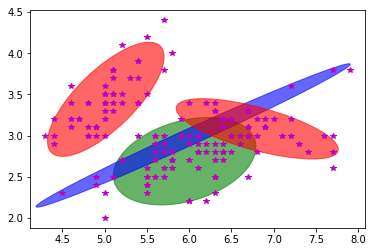

In [16]:
import numpy as np
import pylab as plt    
from matplotlib.patches import Ellipse 
from sklearn import datasets    
from collections import namedtuple
    
class GMM:    
    def __init__(self, k, eps):
        self.k = k ## number of clusters
        self.eps = eps ## threshold to stop `epsilon`
        
        # All parameters from fitting/learning are kept in a named tuple
        from collections import namedtuple
    
    def fit_EM(self, X, max_iters):
        
        # n = number of data-points, d = dimension of data points        
        n, d = X.shape
        
        # randomly choose the starting centroids/means 
        ## as 3 of the points from datasets        
        mu = X[np.random.choice(n, self.k, False), :]
        
        # initialize the covariance matrices for each gaussians
        Sigma= [np.eye(d)] * self.k
        
        # initialize the probabilities/weights for each gaussians
        w = [1./self.k] * self.k
        
        # responsibility matrix is initialized to all zeros
        # we have responsibility for each of n points for eack of k gaussians
        R = np.zeros((n, self.k))
        
        ### log_likelihoods
        log_likelihoods = []
        
        P = lambda mu, s: np.linalg.det(s) ** -.5 ** (2 * np.pi) ** (-X.shape[1]/2.) \
                * np.exp(-.5 * np.einsum('ij, ij -> i',\
                        X - mu, np.dot(np.linalg.inv(s) , (X - mu).T).T ) ) 
                        
        # Iterate till max_iters iterations        
        while len(log_likelihoods) < max_iters:
            
            # E - Step
            
            ## Vectorized implementation of e-step equation to calculate the 
            ## membership for each of k -gaussians
            for k in range(self.k):
                R[:, k] = w[k] * P(mu[k], Sigma[k])

            ### Likelihood computation
            log_likelihood = np.sum(np.log(np.sum(R, axis = 1)))
            
            log_likelihoods.append(log_likelihood)
            
            ## Normalize so that the responsibility matrix is row stochastic
            R = (R.T / np.sum(R, axis = 1)).T
            
            ## The number of datapoints belonging to each gaussian            
            N_ks = np.sum(R, axis = 0)
            
            
            # M Step
            ## calculate the new mean and covariance for each gaussian by 
            ## utilizing the new responsibilities
            for k in range(self.k):
                
                ## means
                mu[k] = 1. / N_ks[k] * np.sum(R[:, k] * X.T, axis = 1).T
                x_mu = np.matrix(X - mu[k])
                
                ## covariances
                Sigma[k] = np.array(1 / N_ks[k] * np.dot(np.multiply(x_mu.T,  R[:, k]), x_mu))
                
                ## and finally the probabilities
                w[k] = 1. / n * N_ks[k]
            # check for convergence
            if len(log_likelihoods) < 2 : continue
            if np.abs(log_likelihood - log_likelihoods[-2]) < self.eps: break
        
        ## bind all results together
    
        self.params = namedtuple('params', ['mu', 'Sigma', 'w', 'log_likelihoods', 'num_iters'])
        self.params.mu = mu
        self.params.Sigma = Sigma
        self.params.w = w
        self.params.log_likelihoods = log_likelihoods
        self.params.num_iters = len(log_likelihoods)       
        
        return self.params
    
    
    def predict(self, x):
        p = lambda mu, s : np.linalg.det(s) ** - 0.5 * (2 * np.pi) **\
                (-len(x)/2) * np.exp( -0.5 * np.dot(x - mu , np.dot(np.linalg.pinv(s) , x - mu)))
        probs = np.array([w * p(mu, s) for mu, s, w in \
            zip(self.params.mu, self.params.Sigma, self.params.w)])
        return probs/np.sum(probs)
        

        
def plot_ellipse(pos, cov, nstd=2, ax=None, **kwargs):
        def eigsorted(cov):
            vals, vecs = np.linalg.eigh(cov)
            order = vals.argsort()[::-1]
            return vals[order], vecs[:,order]
    
        if ax is None:
            ax = plt.gca()
    
        vals, vecs = eigsorted(cov)
        theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
        # Width and height are "full" widths, not radius
        width, height = 2 * nstd * np.sqrt(abs(vals))
        ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    
        ax.add_artist(ellip)
        return ellip    
    
def show(X, mu, cov):
        plt.cla()
        K = len(mu) # number of clusters
        colors = ['r', 'g', 'b']
        plt.plot(X.T[0], X.T[1], 'm*')
        for k in range(K):
            plot_ellipse(mu[k], cov[k],  alpha=0.6, color = colors[k % len(colors)])
    
# Input Data
iris = datasets.load_iris()
X = iris.data[:,:2]
actualLabels = iris.target+1
    
# Executing the EM algorithm for Gaussian Mixture Models
gmm = GMM(4, 0.0001)
params = gmm.fit_EM(X, 1000)
    
predLabels = []
for i in range(len(X)):       
        predLabels.append(np.argmax(gmm.predict(X[i]))+1)

show(X, params.mu, params.Sigma)
plt.show()
# https://gist.github.com/bistaumanga/6023716

### Conclusion

##### We can conclude from the above figures that the Gaussian model with 3 classes fits better than k =2 and k =4. Although more points fit in 4 classes, the groups formed are not as regular as that for k=3 and overlapping of classes occur. This results in misclassification of data points.

## Question 2

In [29]:
from lea import *

altBroken = Lea.boolProb(1,1000)
fanBroken = Lea.boolProb(2,100)

batteryNotCharging = Lea.buildCPT(
(~altBroken & ~fanBroken, Lea.boolProb(5,1000)),
(altBroken & ~fanBroken, Lea.boolProb(1000,1000)),
(~altBroken & fanBroken, Lea.boolProb(1000,1000)),    
(altBroken & fanBroken, Lea.boolProb(1000,1000)))

batteryFlat = Lea.buildCPT(
(~batteryNotCharging, Lea.boolProb(10,100)),
(batteryNotCharging, Lea.boolProb(90,100)))

carNotStart = Lea.boolProb(5,100)

#https://bitbucket.org/piedenis/lea
#https://code.google.com/archive/p/lea/wikis/LeaPyTutorial.wiki

In [24]:
Pf((altBroken).given(carNotStart))

0.001

In [25]:
Pf((fanBroken).given(carNotStart))

0.02

In [26]:
Pf(fanBroken.given(carNotStart & altBroken))

0.02

In [27]:
Pf((altBroken & fanBroken).given(carNotStart)) 

2e-05

# Question 3

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)a
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.iteritems():
        summaries[classValue] = summarize(instances)
        return summaries
    
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.iteritems():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.iteritems():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
 
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions
 
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

#vectorize the dataset
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(newsgroups_train.data)
X_test_counts = count_vect.fit_transform(newsgroups_test.data)

#transform so that weightage is not given to words with more occurances
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train_counts)
X_test = tfidf_transformer.fit_transform(X_test_counts)

summaries = summarizeByClass(X_train)
predictions = getPredictions(summaries, X_test)
metrics.confusion_matrix(newsgroups_test.target, predicted)
 
#https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
#http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
#https://gist.github.com/wzyuliyang/883bb84e88500e32b833
